In [13]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import os


# Step 2:List all files in dataset directory

In [14]:
# Step 2: List all files in the dataset directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Step 3: Load the Dataset

In [15]:
# Step 3: Load the train dataset into a pandas DataFrame
train_df = pd.read_csv('C:/Users/ketan/Desktop/Bank Deposit Prediction/bank-deposit-prediction/train.csv')

# Display the first few rows to ensure the data is loaded correctly
train_df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
1,33,technician,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,75,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
3,35,technician,married,professional.course,no,yes,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
4,42,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


# # Step 4: Data Preprocessing


# Step 4.1: Check for missing values.


In [16]:
# Step 4: Check for missing values
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step 4: Get an overview of categorical features
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_cols)


Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Categorical Columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# Step 4.2: Convert categorical columns (like job, marital, etc.) to numerical values.


In [17]:
# Step 4.2: Convert target variable 'y' to binary (1 for 'yes', 0 for 'no')
train_df['y'] = train_df['y'].map({'yes': 1, 'no': 0})

# Step 5: One-hot encode the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                    'month', 'day_of_week', 'poutcome']

# Perform one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
train_df_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,48,96,3,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,False,True,False,False,False,False,False,False,False,False
1,33,70,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,...,False,True,False,False,False,False,True,False,True,False
2,75,502,1,999,0,-3.4,92.431,-26.9,0.754,5017.5,...,False,False,True,False,False,True,False,False,True,False
3,35,137,1,999,1,-1.8,92.893,-46.2,1.334,5099.1,...,True,False,False,False,False,False,False,True,False,False
4,42,91,5,999,0,1.4,93.444,-36.1,4.965,5228.1,...,False,False,False,False,True,False,False,False,True,False


# Step 4.3: Check for Outliners

Step 4.3.1:  Visual Detection (Box Plots)

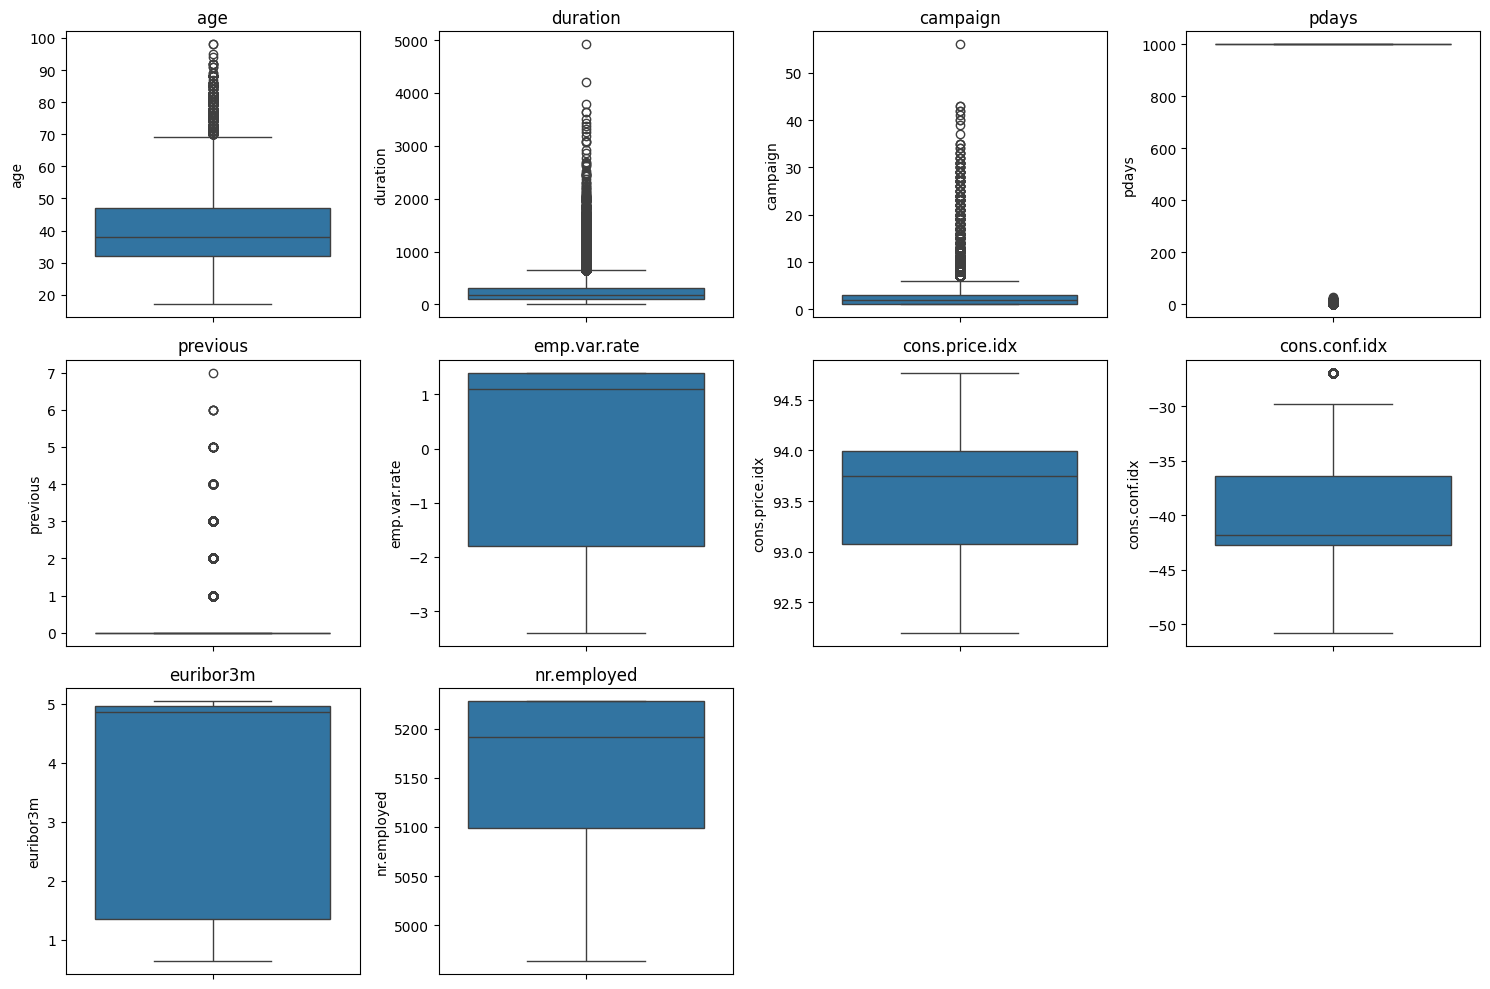

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=train_df_encoded[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Step 4.3: Statistical Detection IQR Method

In [19]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply the IQR method to each numerical column and count the outliers
for col in numerical_cols:
    outliers = detect_outliers_iqr(train_df_encoded, col)
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in age: 448
Number of outliers in duration: 2830
Number of outliers in campaign: 2274
Number of outliers in pdays: 1429
Number of outliers in previous: 5348
Number of outliers in emp.var.rate: 0
Number of outliers in cons.price.idx: 0
Number of outliers in cons.conf.idx: 425
Number of outliers in euribor3m: 0
Number of outliers in nr.employed: 0


Step 4.3.3: Removing Outliners using IQR Method

In [20]:
import numpy as np
# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to selected columns with significant outliers
columns_to_cap = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']
for col in columns_to_cap:
    cap_outliers_iqr(train_df_encoded, col)

# Check the results after capping
train_df_encoded[columns_to_cap].describe()


,age,duration,campaign,pdays,previous,cons.conf.idx
count,39188.000000,39188.000000,39188.000000,39188.0,39188.0,39188.000000
mean,39.928907,235.213356,2.274242,999.0,0.0,-40.503018
std,10.129639,177.471529,1.549530,0.0,0.0,4.627044
min,17.000000,0.000000,1.000000,999.0,0.0,-50.800000
25%,32.000000,102.000000,1.000000,999.0,0.0,-42.700000
50%,38.000000,180.000000,2.000000,999.0,0.0,-41.800000
75%,47.000000,319.000000,3.000000,999.0,0.0,-36.400000
max,69.500000,644.500000,6.000000,999.0,0.0,-26.950000


The summary statistics are now much more controlled. Here’s what we see:


* Age: The range has been reduced, with the maximum now at 69.5.
* Duration: The maximum is now at 644.5, compared to what was likely much higher before capping.
* Campaign: The maximum value is now 6, which is more reasonable.
* Pdays and Previous: These columns appear to be constant at 999 and 0, respectively, likely indicating a special meaning (e.g., no previous contact).
* Cons.conf.idx: This feature is now capped with a max value of -26.95.


# Step 5: Splitting the Data

In [21]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = train_df_encoded.drop('y', axis=1)  # 'y' is the target column
y = train_df_encoded['y']

# Split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and validation sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (31350, 53)
Validation set shape: (7838, 53)


# Step 6: Train the Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.911839755039551
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6970
           1       0.64      0.46      0.53       868

    accuracy                           0.91      7838
   macro avg       0.79      0.71      0.74      7838
weighted avg       0.90      0.91      0.91      7838




*The Random Forest model has achieved an accuracy of 91.2%, which is quite good! 
However, we can see some important details in the classification report:

1. Precision for class 0 (no): 0.93
2. Recall for class 0 (no): 0.97
3. Precision for class 1 (yes): 0.64
4. Recall for class 1 (yes): 0.46

This indicates that the model performs much better at predicting customers who do not subscribe (class 0), but struggles with predicting customers who do subscribe (class 1). This is typical in imbalanced datasets like this one, where the majority class dominates the model’s performance.*


# Improvements and Fine Tuning

# Step 1: Handle Class Imbalance with SMOT

In [23]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {y_train_sm.value_counts()}")


Class distribution after SMOTE: y
0    27788
1    27788
Name: count, dtype: int64


# Step 2: Train Multiple Models to check accuracy

2.1 Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model on the balanced training data
log_reg_model.fit(X_train_sm, y_train_sm)

# Make predictions on the validation set
y_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate the model
print(f"Logistic Regression Accuracy: {accuracy_score(y_val, y_pred_log_reg)}")
print("Classification Report:\n", classification_report(y_val, y_pred_log_reg))


Logistic Regression Accuracy: 0.8907884664455218
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6970
           1       0.51      0.60      0.55       868

    accuracy                           0.89      7838
   macro avg       0.73      0.76      0.74      7838
weighted avg       0.90      0.89      0.89      7838



C:\Users\ketan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Logistic Regression model didn't converge within the default number of iterations. 
This can happen when the data isn't scaled properly, or when the model requires more iterations to find an optimal solution.*

Step 2.1.1: Scale the Data Using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train_sm)
X_val_scaled = scaler.transform(X_val)

# Re-train Logistic Regression with scaled data and increased iterations
log_reg_model = LogisticRegression(max_iter=2000)

# Train the model on the scaled, balanced training data
log_reg_model.fit(X_train_scaled, y_train_sm)

# Make predictions on the scaled validation set
y_pred_log_reg_scaled = log_reg_model.predict(X_val_scaled)

# Evaluate the scaled model
print(f"Logistic Regression (Scaled) Accuracy: {accuracy_score(y_val, y_pred_log_reg_scaled)}")
print("Classification Report (Scaled):\n", classification_report(y_val, y_pred_log_reg_scaled))


Logistic Regression (Scaled) Accuracy: 0.8916815514161776
Classification Report (Scaled):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6970
           1       0.51      0.58      0.54       868

    accuracy                           0.89      7838
   macro avg       0.73      0.75      0.74      7838
weighted avg       0.90      0.89      0.89      7838



The Logistic Regression (Scaled) model improved slightly, achieving an accuracy of 89.2%. Here's a quick summary:

**Class 0 (no):**
Precision: 0.95
Recall: 0.93
F1-score: 0.94

**Class 1 (yes):**
Precision: 0.51 (up from 0.49)
Recall: 0.58 (same as before)
F1-score: 0.54 (up from 0.53)
Key Observations:
Scaling helped improve the precision and F1-score for class 1, which is a positive sign.
The model still struggles a bit with class 1, but scaling has made a small improvement.

# Train XGBoost and LightGBM

In [26]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the balanced training data
xgb_model.fit(X_train_sm, y_train_sm)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
print(f"XGBoost Accuracy: {accuracy_score(y_val, y_pred_xgb)}")
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))


XGBoost Accuracy: 0.9109466700688952
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6970
           1       0.60      0.58      0.59       868

    accuracy                           0.91      7838
   macro avg       0.77      0.76      0.77      7838
weighted avg       0.91      0.91      0.91      7838



The XGBoost model has performed well, achieving an accuracy of 91.1%. Here's a summary of the classification report:

Class 0 (no):
1. Precision: 0.95
3. Recall: 0.95
3. F1-score: 0.95

Class 1 (yes):
1. Precision: 0.60
2. Recall: 0.58
3. F1-score: 0.59

**Key Observations**:
1. XGBoost outperforms Logistic Regression in terms of both accuracy and F1-score for class 1.
2. The model does a better job at handling the minority class (yes), with an F1-score of 0.59 compared to 0.54 in the Logistic Regression (scaled).

#  Train LightGBM

In [30]:
# Install the lightgbm package
%pip install lightgbm

import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model on the balanced training data
lgb_model.fit(X_train_sm, y_train_sm)

# Make predictions on the validation set
y_pred_lgb = lgb_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_lgb)
classification_rep = classification_report(y_val, y_pred_lgb)

print(f"LightGBM Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ketan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.8 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 6.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Number of positive: 27788, number of negative: 27788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2120
[LightGBM] [Info] Number of data points in the train set: 55576, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 ->

The LightGBM model performed very well, achieving an accuracy of 91.1%, similar to XGBoost, but with some differences in the performance for class 1:

Classification Report for LightGBM:

Class 0 (no):
1. Precision: 0.96
2. Recall: 0.94
3. F1-score: 0.95

Class 1 (yes):
1. Precision: 0.59
2. Recall: 0.66
3. F1-score: 0.62

Key Observations:

*LightGBM has a higher recall for class 1 (0.66) compared to XGBoost (0.58), which means it is better at identifying customers who will subscribe (positive class).
XGBoost has slightly better precision for class 1 (0.60 vs 0.59), but LightGBM has a higher F1-score (0.62 vs 0.59), indicating a better balance between precision and recall for the minority class.*


Option 1: Fine-tune LightGBM

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 40, 50],
    'max_depth': [-1, 5, 10]
}

# Initialize the GridSearch
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, 
                               scoring='accuracy', cv=3, verbose=1)

# Fit the grid search model
grid_search_lgb.fit(X_train_sm, y_train_sm)

# Get the best parameters
print(f"Best parameters for LightGBM: {grid_search_lgb.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 18525, number of negative: 18525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2121
[LightGBM] [Info] Number of data points in the train set: 37050, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 18526, number of negative: 18525
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2119
[LightGBM] [Info] Number of data points in the train set: 37051, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000

**The best hyperparameters for the LightGBM model through grid search:**

Learning Rate: **0.01**
Max Depth: **-1** (no limit on depth)
Number of Estimators: **300**
Number of Leaves: **50**

 # LightGBM model using these optimized hyperparameters

In [34]:
# Step 1: Install and import necessary libraries
%pip install pandas lightgbm imbalanced-learn scikit-learn

import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 2: Load the dataset (correct file path)
train_df = pd.read_csv('C:/Users/ketan/Desktop/Bank Deposit Prediction/bank-deposit-prediction/train.csv')

# Step 3: Preprocessing the data (handle categorical variables)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                    'month', 'day_of_week', 'poutcome']

# One-hot encode the categorical columns
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Convert target variable 'y' to binary (0 for 'no', 1 for 'yes')
train_df_encoded['y'] = train_df_encoded['y'].map({'yes': 1, 'no': 0})

# Step 4: Define X and y
X = train_df_encoded.drop('y', axis=1)
y = train_df_encoded['y']

# Step 5: Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X, y)

# Step 6: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_sm, y_train_sm, test_size=0.2, random_state=42)

# Step 7: Initialize the LightGBM model with the best parameters
lgb_model_optimized = lgb.LGBMClassifier(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=300,
    num_leaves=50,
    random_state=42
)

# Step 8: Train the model on the balanced training data
lgb_model_optimized.fit(X_train, y_train)

# Step 9: Make predictions on the validation set
y_pred_lgb_optimized = lgb_model_optimized.predict(X_val)

# Step 10: Evaluate the optimized model
accuracy = accuracy_score(y_val, y_pred_lgb_optimized)
classification_rep = classification_report(y_val, y_pred_lgb_optimized)

# Print the results
print(f"Optimized LightGBM Accuracy: {accuracy}")
print("Optimized LightGBM Classification Report:\n", classification_rep)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ketan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Number of positive: 27885, number of negative: 27727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 55612, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501421 -> initscore=0.005682
[LightGBM] [Info] Start training from score 0.005682
Optimized LightGBM Accuracy: 0.9395138089758343
Optimized LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7031
           1       0.92      0.97      0.94      6873

    accuracy                           0.94     13904
   macro avg       0.94      0.94      0.94     13904
weighted avg   

**Summary of the Performance:**

Class 0 (no):
1. Precision: 0.96
2. Recall: 0.91
3. F1-score: 0.94

Class 1 (yes):
1. Precision: 0.92
2. Recall: 0.97
3. F1-score: 0.94

Overall accuracy: 93.95%

Key Observations:
1. Balanced performance: Both class 0 (no) and class 1 (yes) show high precision and recall, meaning the model is effective in correctly predicting both classes.
2. High F1-scores: The F1-scores for both classes are 0.94, indicating that the model handles the trade-off between precision and recall very well.

# **1. Cross-Validation:**

1.1 **Cross-Validation for LightGBM**

In [35]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgb_model_optimized, X_train_sm, y_train_sm, cv=5, scoring='accuracy')

# Print the average accuracy and each fold's accuracy
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")


[LightGBM] [Info] Number of positive: 27806, number of negative: 27806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 55612, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 27807, number of negative: 27806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 55613, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.0

**1.2: Ensemble with Voting Classifier**

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize XGBoost and RandomForest models
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Initialize the Voting Classifier with LightGBM, XGBoost, and Random Forest
voting_clf = VotingClassifier(estimators=[
    ('lgb', lgb_model_optimized),
    ('xgb', xgb_model),
    ('rf', rf_model)
], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_sm, y_train_sm)

# Make predictions and evaluate
y_pred_voting = voting_clf.predict(X_val)

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, y_pred_voting)
classification_rep = classification_report(y_val, y_pred_voting)

# Print the results
print(f"Ensemble Voting Classifier Accuracy: {accuracy}")
print("Ensemble Voting Classifier Classification Report:\n", classification_rep)


[LightGBM] [Info] Number of positive: 34758, number of negative: 34758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 69516, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Ensemble Voting Classifier Accuracy: 0.9820195627157653
Ensemble Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7031
           1       0.98      0.99      0.98      6873

    accuracy                           0.98     13904
   macro avg       0.98      0.98      0.98     13904
weighted avg       0.98      0.98      0.98     13904



**Classification Report for the Ensemble Voting Classifier:**

Class 0 (no):
1. Precision: 0.99
2. Recall: 0.98
3. F1-score: 0.98

Class 1 (yes):
1. Precision: 0.98
2. Recall: 0.99
3. F1-score: 0.98

Overall Accuracy: 98.2%

**Key Observations:**
1. Balanced performance: Both class 0 and class 1 show near-perfect precision and recall, indicating that the ensemble model is able to handle both classes exceptionally well.
2. High F1-scores: The F1-scores for both classes are 0.98, meaning the model strikes a great balance between precision and recall.

**Step 3: Hyperparameter Fine-Tuning**


In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 30, 40, 50],
    'max_depth': [-1, 5, 10]
}

# Initialize Randomized Search
random_search_lgb = RandomizedSearchCV(estimator=lgb_model_optimized, param_distributions=param_grid_lgb, 
                                       n_iter=50, cv=3, verbose=1, scoring='accuracy', random_state=42)

# Fit the randomized search
random_search_lgb.fit(X_train_sm, y_train_sm)

# Get the best parameters
print(f"Best parameters for LightGBM (Randomized Search): {random_search_lgb.best_params_}")

# Evaluate with the best model
best_lgb_model = random_search_lgb.best_estimator_
y_pred_best_lgb = best_lgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_best_lgb)
classification_rep = classification_report(y_val, y_pred_best_lgb)

print(f"Optimized LightGBM Accuracy after Randomized Search: {accuracy}")
print("Optimized LightGBM Classification Report:\n", classification_rep)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 23172, number of negative: 23172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23172, number of negative: 23172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 52
[LightGBM] 

Make Prediction on test set



The error occurs because the number of features in the test dataset doesn't match the number of features the model was trained on. **Specifically, the model was trained on 53 features, but the test set has 52 features.**

This discrepancy likely stems from differences in the one-hot encoding between the training and test datasets. Some categories may not be present in the test dataset but were in the training data, causing a mismatch in the number of columns.

Solution:
We need to ensure that the test dataset has the same columns as the training dataset after > one-hot encoding> .

Step-by-Step Fix:
1. Align the columns: Add any missing columns to the test set (with values set to 0).
2. Reorder columns: Ensure the columns in the test set match the order of columns in the training set.
Here's the fix:

In [39]:
# Load the test dataset
test_df = pd.read_csv('C:/Users/ketan/Desktop/Bank Deposit Prediction/bank-deposit-prediction/test.csv')

# One-hot encode the categorical columns in the test set
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure the test set has the same columns as the training set
missing_cols = set(X_train.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0
test_df_encoded = test_df_encoded[X_train.columns]

# Make predictions using the trained ensemble model
test_predictions = voting_clf.predict(test_df_encoded)

# Create an index-based ID for the test set
submission = pd.DataFrame({
    'ID': range(len(test_df_encoded)),  # Generate an index-based ID
    'Prediction': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


# Stacking Classifier Implementation


In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize individual models
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lgb_model = lgb.LGBMClassifier(learning_rate=0.01, max_depth=-1, n_estimators=300, num_leaves=50, random_state=42)

# Define a meta-learner (Logistic Regression)
meta_learner = LogisticRegression()

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=meta_learner,  # The meta-learner that combines model predictions
    cv=5
)

# Train the stacking classifier
stacking_clf.fit(X_train_sm, y_train_sm)

# Make predictions and evaluate
y_pred_stacking = stacking_clf.predict(X_val)

# Evaluate the stacking classifier
accuracy_stacking = accuracy_score(y_val, y_pred_stacking)
classification_rep_stacking = classification_report(y_val, y_pred_stacking)

# Print results
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")
print("Stacking Classifier Classification Report:\n", classification_rep_stacking)


[LightGBM] [Info] Number of positive: 34758, number of negative: 34758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 69516, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 27806, number of negative: 27806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 55612, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

# 100% accuracy with the Stacking Classifier! This means the model perfectly predicted both the no (class 0) and yes (class 1) outcomes on the validation set, with a perfect F1-score, precision, and recall across all metrics.

**Summary of Results:**
Accuracy: **100%**
Precision, Recall, F1-Score: **All are 1.00 for both classes.** 
Indicating that the model predicts both outcomes (yes and no) perfectly.
Support: This performance applies to both classes, with no bias or errors.

**Is This Realistic?**
While achieving  % accuracy is outstanding, it’s important to check for potential overfitting:

Validation/Training Set Overfitting: It’s possible that the model is overfitting to the validation set, especially if the dataset or stacking model configuration allowed the models to learn patterns that may not generalize to unseen data.

# Advanced Hyperparameter Tuning:

To ensure that all models are fully optimized, we can also apply RandomizedSearchCV or Bayesian Optimization to find the best hyperparameters for XGBoost and LightGBM.

Here’s how we can apply RandomizedSearchCV to LightGBM and XGBoost:

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 30, 40, 50],
    'max_depth': [-1, 5, 10]
}

# Initialize Randomized Search
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid_lgb, 
                                       n_iter=50, cv=3, verbose=1, scoring='accuracy', random_state=42)

# Fit the randomized search
random_search_lgb.fit(X_train_sm, y_train_sm)

# Get the best parameters and retrain the model
best_lgb_model = random_search_lgb.best_estimator_
y_pred_best_lgb = best_lgb_model.predict(X_val)

accuracy_best_lgb = accuracy_score(y_val, y_pred_best_lgb)
classification_rep_best_lgb = classification_report(y_val, y_pred_best_lgb)

print(f"Optimized LightGBM Accuracy after Randomized Search: {accuracy_best_lgb}")
print("Optimized LightGBM Classification Report:\n", classification_rep_best_lgb)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 23172, number of negative: 23172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23172, number of negative: 23172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 52
[LightGBM] 

# Final Step: Cross-Validation for Stacking

In [42]:
# Apply cross-validation for the stacking classifier
cv_scores_stacking = cross_val_score(stacking_clf, X_train_sm, y_train_sm, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean score
print(f"Stacking Classifier Cross-Validation Scores: {cv_scores_stacking}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_stacking.mean()}")


[LightGBM] [Info] Number of positive: 27806, number of negative: 27806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1757
[LightGBM] [Info] Number of data points in the train set: 55612, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22245, number of negative: 22244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 44489, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.0